Projection shape:  (1288, 10)


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


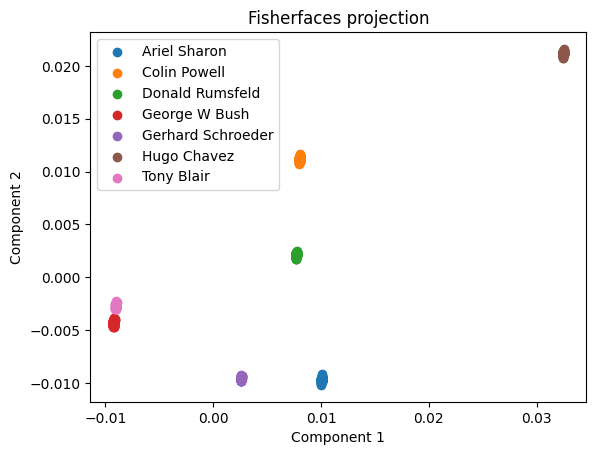

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

def fetch_lfw():
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    X = lfw_people.data
    y = lfw_people.target
    target_names = lfw_people.target_names
    return X, y, target_names

def compute_means_and_scatters(X, y):
    mean_total = np.mean(X, axis=0)
    unique_classes = np.unique(y)
    mean_classes = []
    scatter_within = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)
    scatter_between = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)

    for c in unique_classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        mean_classes.append(mean_c)

        scatter_within += np.dot((X_c - mean_c).T, (X_c - mean_c))
        n_c = X_c.shape[0]
        mean_diff = (mean_c - mean_total).reshape(-1, 1)
        scatter_between += n_c * (mean_diff).dot(mean_diff.T)

    return mean_total, mean_classes, scatter_within, scatter_between

def fisherfaces(X, y, num_components):
    mean_total, mean_classes, scatter_within, scatter_between = compute_means_and_scatters(X, y)
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))

    # Sort the eigenvalues and select the top 'num_components' eigenvectors
    idx = np.argsort(-eigenvalues.real)[:num_components]
    eigenvectors = eigenvectors[:, idx]

    return eigenvectors

def project(X, eigenvectors):
    return X.dot(eigenvectors)

def plot_fisherfaces(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Fisherfaces projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def main():
    X, y, target_names = fetch_lfw()

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    num_components = 10  # Number of Fisherfaces
    eigenvectors = fisherfaces(X, y, num_components)
    projected = project(X, eigenvectors)

    print("Projection shape: ", projected.shape)
    # Now, 'projected' contains the data in the Fisherfaces space.

    # Plot the first two components
    plot_fisherfaces(projected, y, target_names)

if __name__ == "__main__":
    main()


Projection shape (Fisherfaces):  (1288, 10)


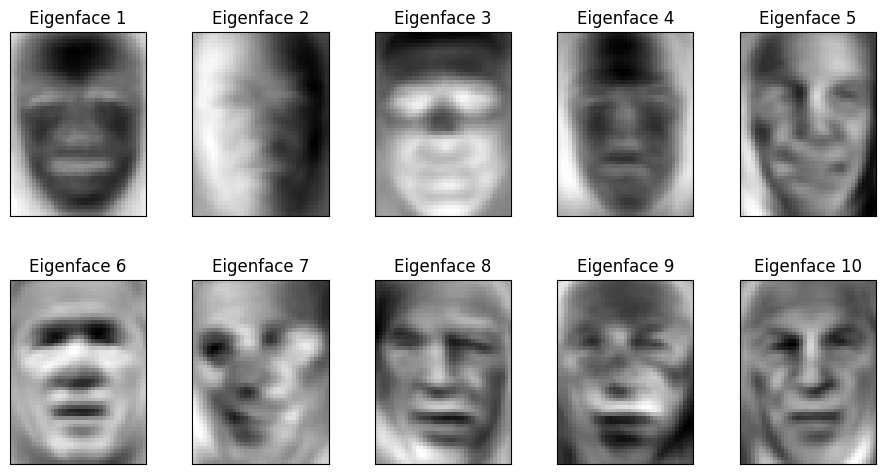

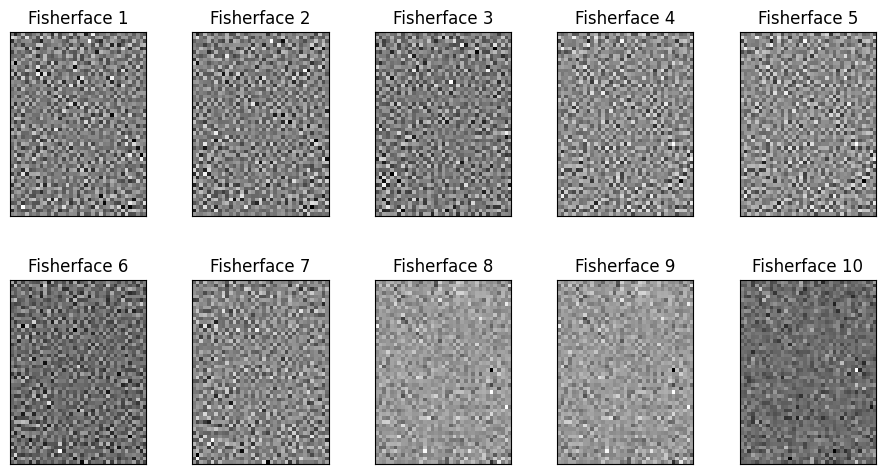

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


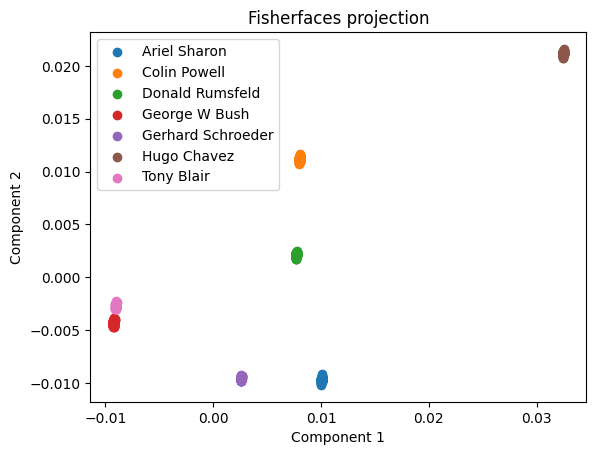

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fetch_lfw():
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    X = lfw_people.data
    y = lfw_people.target
    target_names = lfw_people.target_names
    return X, y, target_names

def compute_means_and_scatters(X, y):
    mean_total = np.mean(X, axis=0)
    unique_classes = np.unique(y)
    mean_classes = []
    scatter_within = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)
    scatter_between = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)

    for c in unique_classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        mean_classes.append(mean_c)

        scatter_within += np.dot((X_c - mean_c).T, (X_c - mean_c))
        n_c = X_c.shape[0]
        mean_diff = (mean_c - mean_total).reshape(-1, 1)
        scatter_between += n_c * (mean_diff).dot(mean_diff.T)

    return mean_total, mean_classes, scatter_within, scatter_between

def fisherfaces(X, y, num_components):
    mean_total, mean_classes, scatter_within, scatter_between = compute_means_and_scatters(X, y)
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))

    # Sort the eigenvalues and select the top 'num_components' eigenvectors
    idx = np.argsort(-eigenvalues.real)[:num_components]
    eigenvectors = eigenvectors[:, idx]

    return eigenvectors

def project(X, eigenvectors):
    return X.dot(eigenvectors)

def plot_fisherfaces(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Fisherfaces projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def plot_eigenfaces(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_fisherfaces_images(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].real.reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Fisherface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def main():
    X, y, target_names = fetch_lfw()
    h, w = fetch_lfw_people(min_faces_per_person=70, resize=0.4).images.shape[1:3]

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    num_components = 10  # Number of components for both Eigenfaces and Fisherfaces

    # Compute Eigenfaces
    pca = PCA(n_components=num_components)
    pca.fit(X)
    eigenfaces = pca.components_.T

    # Compute Fisherfaces
    eigenvectors_fisher = fisherfaces(X, y, num_components)
    projected_fisher = project(X, eigenvectors_fisher)

    print("Projection shape (Fisherfaces): ", projected_fisher.shape)

    # Plot Eigenfaces
    plot_eigenfaces(eigenfaces, h, w)

    # Plot Fisherfaces
    plot_fisherfaces_images(eigenvectors_fisher, h, w)

    # Plot the first two components of Fisherfaces
    plot_fisherfaces(projected_fisher, y, target_names)

if __name__ == "__main__":
    main()


Projection shape (Fisherfaces):  (1288, 10)


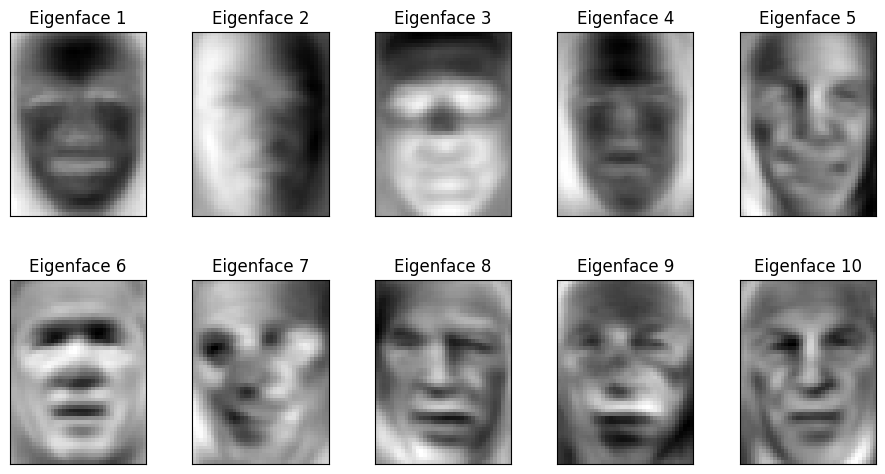

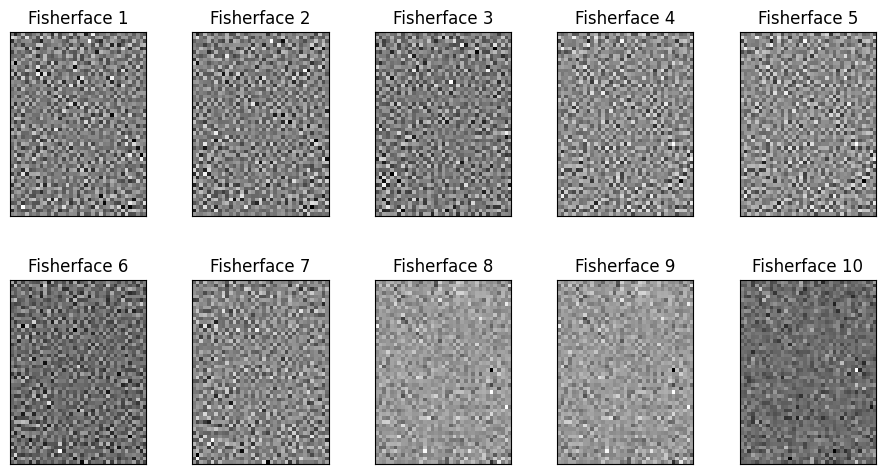

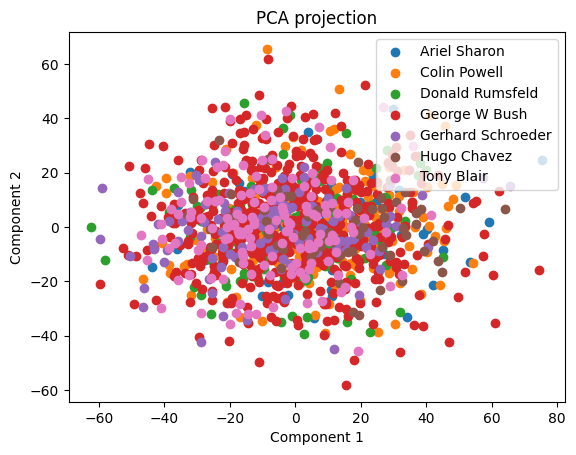

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


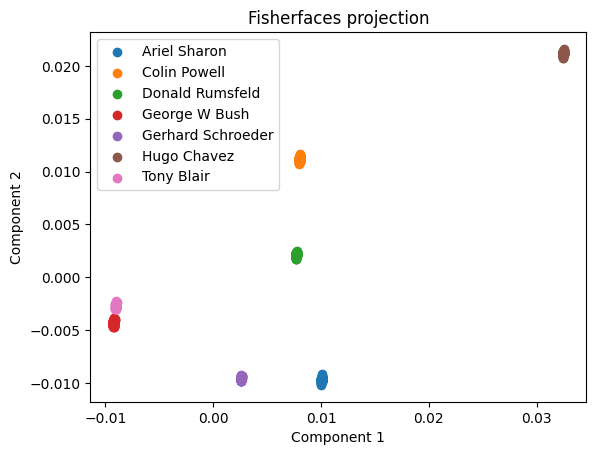

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fetch_lfw():
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    X = lfw_people.data
    y = lfw_people.target
    target_names = lfw_people.target_names
    return X, y, target_names

def compute_means_and_scatters(X, y):
    mean_total = np.mean(X, axis=0)
    unique_classes = np.unique(y)
    mean_classes = []
    scatter_within = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)
    scatter_between = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)

    for c in unique_classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        mean_classes.append(mean_c)

        scatter_within += np.dot((X_c - mean_c).T, (X_c - mean_c))
        n_c = X_c.shape[0]
        mean_diff = (mean_c - mean_total).reshape(-1, 1)
        scatter_between += n_c * (mean_diff).dot(mean_diff.T)

    return mean_total, mean_classes, scatter_within, scatter_between

def fisherfaces(X, y, num_components):
    mean_total, mean_classes, scatter_within, scatter_between = compute_means_and_scatters(X, y)
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))

    # Sort the eigenvalues and select the top 'num_components' eigenvectors
    idx = np.argsort(-eigenvalues.real)[:num_components]
    eigenvectors = eigenvectors[:, idx]

    return eigenvectors

def project(X, eigenvectors):
    return X.dot(eigenvectors)

def plot_fisherfaces(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Fisherfaces projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def plot_pca(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('PCA projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def plot_eigenfaces(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_fisherfaces_images(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].real.reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Fisherface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def main():
    X, y, target_names = fetch_lfw()
    h, w = fetch_lfw_people(min_faces_per_person=70, resize=0.4).images.shape[1:3]

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    num_components = 10  # Number of components for both Eigenfaces and Fisherfaces

    # Compute Eigenfaces
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    eigenfaces = pca.components_.T

    # Compute Fisherfaces
    eigenvectors_fisher = fisherfaces(X, y, num_components)
    projected_fisher = project(X, eigenvectors_fisher)

    print("Projection shape (Fisherfaces): ", projected_fisher.shape)

    # Plot Eigenfaces
    plot_eigenfaces(eigenfaces, h, w)

    # Plot Fisherfaces
    plot_fisherfaces_images(eigenvectors_fisher, h, w)

    # Plot the first two components of PCA
    plot_pca(X_pca, y, target_names)

    # Plot the first two components of Fisherfaces
    plot_fisherfaces(projected_fisher, y, target_names)

if __name__ == "__main__":
    main()


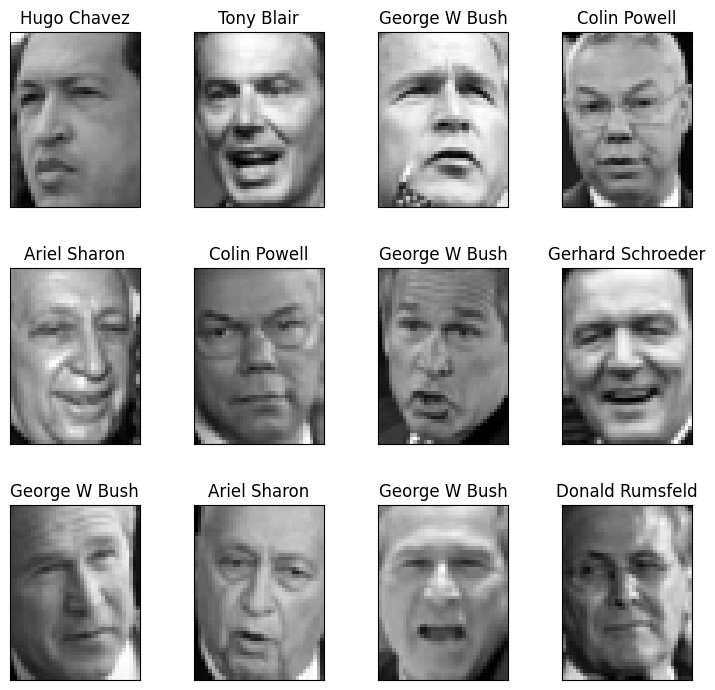

Projection shape (Fisherfaces):  (1288, 10)


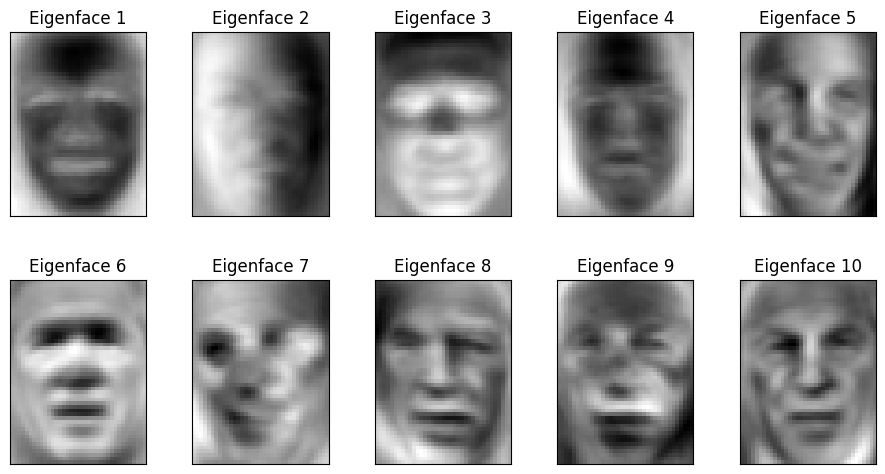

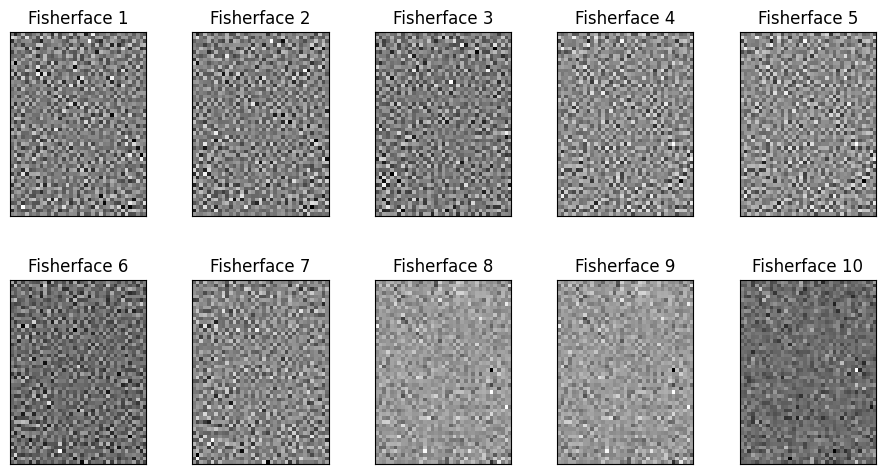

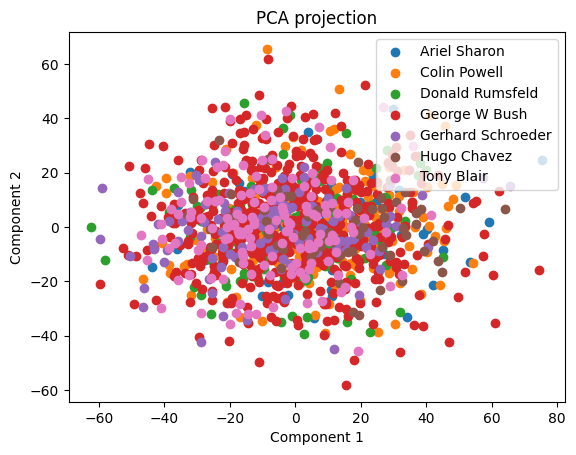

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


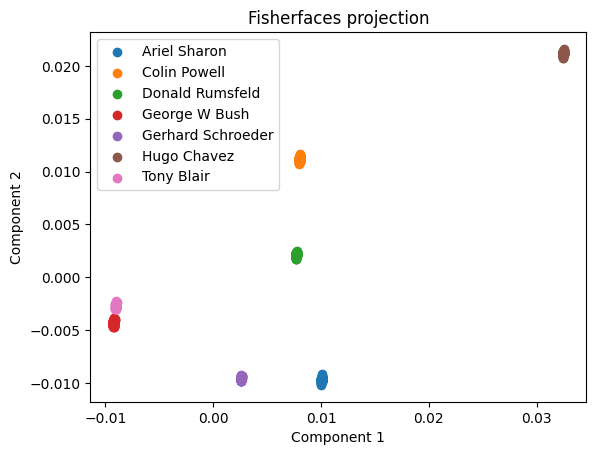

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fetch_lfw():
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    X = lfw_people.data
    y = lfw_people.target
    target_names = lfw_people.target_names
    images = lfw_people.images
    return X, y, target_names, images

def compute_means_and_scatters(X, y):
    mean_total = np.mean(X, axis=0)
    unique_classes = np.unique(y)
    mean_classes = []
    scatter_within = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)
    scatter_between = np.zeros((X.shape[1], X.shape[1]), dtype=np.float32)

    for c in unique_classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        mean_classes.append(mean_c)

        scatter_within += np.dot((X_c - mean_c).T, (X_c - mean_c))
        n_c = X_c.shape[0]
        mean_diff = (mean_c - mean_total).reshape(-1, 1)
        scatter_between += n_c * (mean_diff).dot(mean_diff.T)

    return mean_total, mean_classes, scatter_within, scatter_between

def fisherfaces(X, y, num_components):
    mean_total, mean_classes, scatter_within, scatter_between = compute_means_and_scatters(X, y)
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))

    # Sort the eigenvalues and select the top 'num_components' eigenvectors
    idx = np.argsort(-eigenvalues.real)[:num_components]
    eigenvectors = eigenvectors[:, idx]

    return eigenvectors

def project(X, eigenvectors):
    return X.dot(eigenvectors)

def plot_fisherfaces(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Fisherfaces projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def plot_pca(projected, labels, target_names):
    plt.figure()
    unique_labels = np.unique(labels)
    for label in unique_labels:
        data = projected[labels == label]
        plt.scatter(data[:, 0], data[:, 1], label=target_names[label])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('PCA projection')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

def plot_eigenfaces(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_fisherfaces_images(eigenvectors, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenvectors[:, i].real.reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Fisherface {i + 1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_sample_faces(images, labels, target_names, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(target_names[labels[i]])
        plt.xticks(())
        plt.yticks(())
    plt.show()

def main():
    X, y, target_names, images = fetch_lfw()
    h, w = images.shape[1:3]

    # Plot sample faces with their labels
    plot_sample_faces(images, y, target_names)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    num_components = 10  # Number of components for both Eigenfaces and Fisherfaces

    # Compute Eigenfaces
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    eigenfaces = pca.components_.T

    # Compute Fisherfaces
    eigenvectors_fisher = fisherfaces(X, y, num_components)
    projected_fisher = project(X, eigenvectors_fisher)

    print("Projection shape (Fisherfaces): ", projected_fisher.shape)

    # Plot Eigenfaces
    plot_eigenfaces(eigenfaces, h, w)

    # Plot Fisherfaces
    plot_fisherfaces_images(eigenvectors_fisher, h, w)

    # Plot the first two components of PCA
    plot_pca(X_pca, y, target_names)

    # Plot the first two components of Fisherfaces
    plot_fisherfaces(projected_fisher, y, target_names)

if __name__ == "__main__":
    main()
